# Optimal Growth

In [31]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import datetime
from typing import Tuple
class Vector: pass

0.15405029000464884
(200, 1) (200, 1)


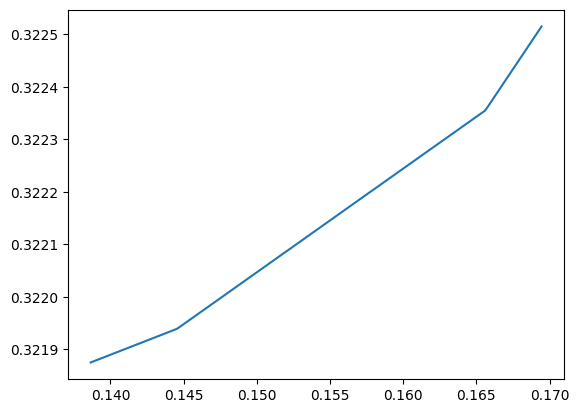

In [39]:
# Model parameters
A = 1
β = 0.9
α = 0.3
Kss = 1/(α*β*A)**(1/(α-1))
print(Kss)
xmin=Kss*0.9
xmax=Kss*1.1
min_FB = lambda a,b: a+b-tf.sqrt(a**2+b**2)
layers = [
    tf.keras.layers.Normalization(axis=-1, input_dim=1, mean=0, variance=1, invert=False),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(32, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
]
perceptron = tf.keras.Sequential(layers)

def model(x:Vector)->Tuple[Vector]:
    sh = perceptron(x)
    return sh

λ=1
xvec = np.power(np.linspace(xmin**(1/λ),xmax**(1/λ),200,dtype='float32'),λ).reshape(-1,1)
#print(xvec)
print(xvec.shape, model(xvec).shape)
plt.plot(xvec, model(xvec), label = 'c(x)')

In [40]:
def residuals(k:Vector):
    c=model(k)
    kp=A*k**α-c
    cp=model(kp)
    R = min_FB(A*k**α-c,c**(-1)-β*cp**(-1)*(A*α*kp**(α-1)))
    return R

#print(residuals(xvec));

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R = residuals(x)
    R_squared = R*R
    return tf.reduce_mean(R_squared)

n = 500
v = J(n)
v.numpy()

0.0458842

In [41]:
θ = perceptron.trainable_variables
#print(str(θ)[:1000])

In [82]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = Adam()
optimizer.lr.assign(0.00001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-05>

In [83]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

In [84]:
results = train_me(5000)

100%|████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 469.07it/s]


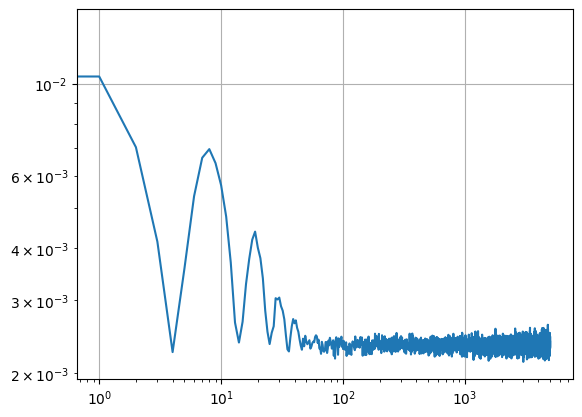

In [85]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

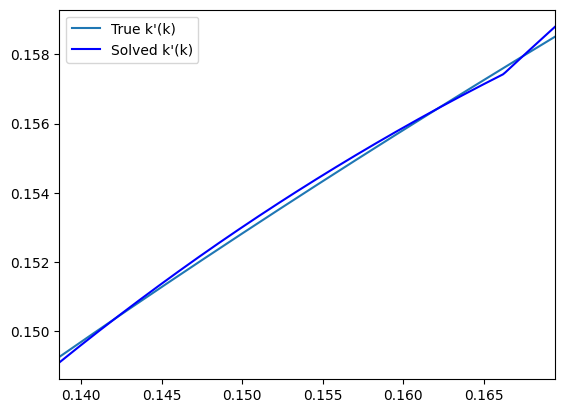

In [86]:
plt.plot(xvec,α*β*A*xvec**α, label="True k'(k)")
plt.plot(xvec,(A*xvec**α)-model(xvec),label="Solved k'(k)",c='b')
plt.xlim([xmin,xmax])
plt.legend()
#plt.ylim([0,1])
plt.show()